In [1]:
####### Importation des packages #########
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Ouvrir le fichier NetCDF contenant les données SST
ds = xr.open_mfdataset("./my_data_folder/eursst_folder/*.nc", combine="by_coords")

# Extraction des températures analysées (analysed_sst)
sst = ds["analysed_sst"]

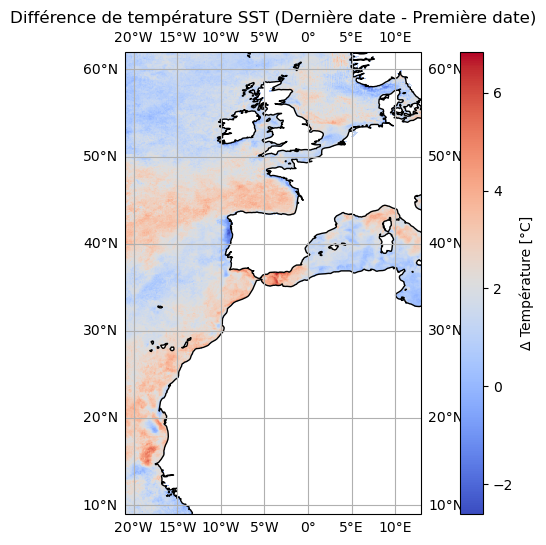

In [2]:
# Sélection des dates extrêmes
sst_oldest = sst.isel(time=0)  # Première date
sst_latest = sst.isel(time=-1) # Dernière date

# Calcul de la différence de température
sst_diff = sst_latest - sst_oldest

# Création de la figure
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={"projection": ccrs.PlateCarree()})
ax.set_extent([-21, 13, 9, 62], crs=ccrs.PlateCarree())  # Définition de l'étendue des données

# Ajout de la différence de température
c = ax.pcolormesh(sst_diff.lon, sst_diff.lat, sst_diff, cmap="coolwarm", transform=ccrs.PlateCarree())

# Ajout des côtes et grilles
ax.add_feature(cfeature.COASTLINE, linewidth=1)
ax.gridlines(draw_labels=True)

# Ajout d'une barre de couleur
cbar = plt.colorbar(c, ax=ax, orientation="vertical", fraction=0.05, pad=0.05)
cbar.set_label("Δ Température [°C]")

# Titre
plt.title("Différence de température SST (Dernière date - Première date)")

# Affichage
plt.savefig("./my_data_folder/diff_sst_map.png", bbox_inches="tight", dpi=300)
plt.show()

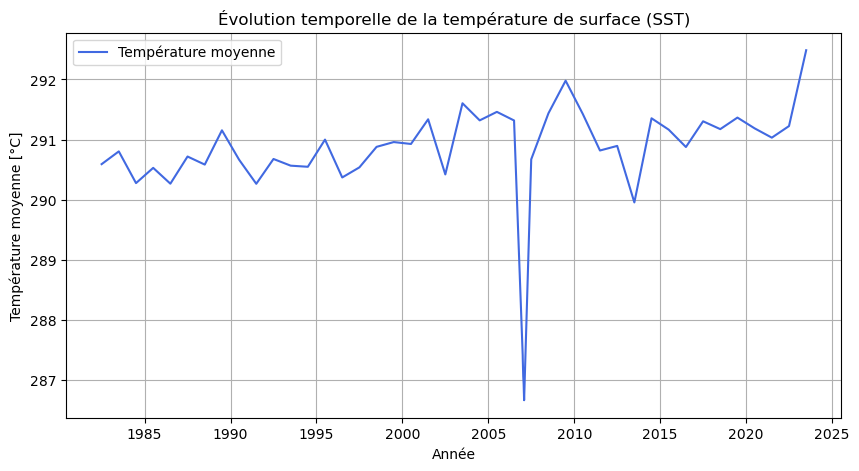

In [3]:
# Moyenne spatiale sur toute la région
sst_mean = sst.mean(dim=["lat", "lon"])

# Création du graphique
plt.figure(figsize=(10, 5))
plt.plot(sst_mean.time, sst_mean, label="Température moyenne", color="royalblue")

# Ajout des labels et titre
plt.xlabel("Année")
plt.ylabel("Température moyenne [°K]")
plt.title("Évolution temporelle de la température de surface (SST)")
plt.legend()
plt.grid()

# Enregistrement de l'image
plt.savefig("./my_data_folder/sst_time_series.png", bbox_inches="tight", dpi=300)

# Affichage
plt.show()

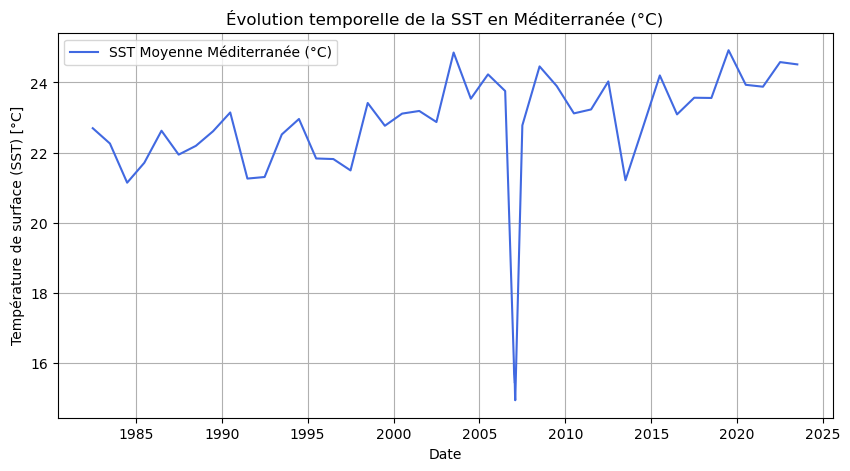

In [4]:
# Définir les limites géographiques de la Méditerranée
lat_min = 30   # Latitude minimale (30°N)
lat_max = 45   # Latitude maximale (45°N)
lon_min = -5   # Longitude minimale (5°W)
lon_max = 37   # Longitude maximale (37°E)

# Extraire les données SST dans la zone méditerranéenne
sst_mediterranean = sst.sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))

# Calculer la moyenne de la SST sur cette zone (moyenne spatiale)
sst_mean_mediterranean = sst_mediterranean.mean(dim=["lat", "lon"])

# Création du graphique pour l'évolution temporelle de la SST moyenne en Méditerranée en Celsius
plt.figure(figsize=(10, 5))
plt.plot(sst_mean_mediterranean.time, sst_mean_mediterranean - 273.15, label="SST Moyenne Méditerranée (°C)", color="royalblue")

# Ajout des labels et du titre
plt.xlabel("Date")
plt.ylabel("Température de surface (SST) [°C]")
plt.title("Évolution temporelle de la SST en Méditerranée (°C)")
plt.legend()
plt.grid()

# Affichage
plt.show()





Ouverture du fichier : my_data_folder/sea_level_folder/omi_climate_sl_medsea_area_averaged_anomalies_19930101_P20240228.nc


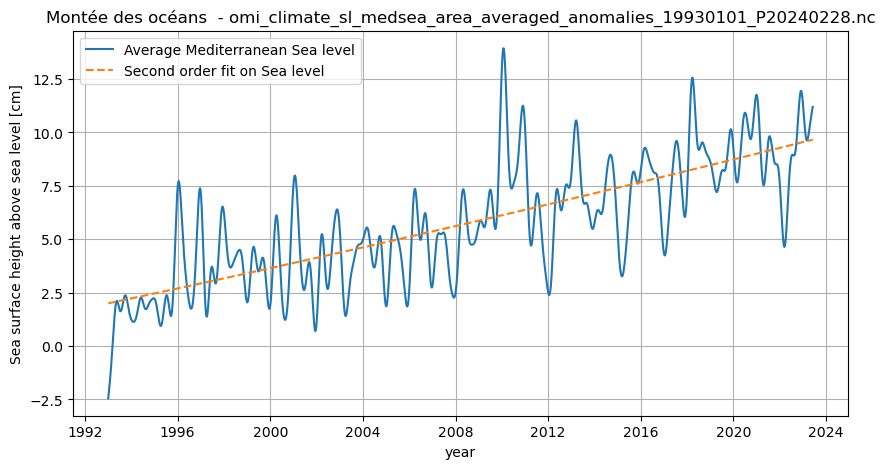

In [11]:
import xarray as xr
import matplotlib.pyplot as plt
import os

# Dossier contenant les fichiers NetCDF
folder_path = 'my_data_folder/sea_level_folder'

# Obtenez la liste des fichiers NetCDF dans le dossier
files = [f for f in os.listdir(folder_path) if f.endswith('.nc')]

# Visualiser les données
for file_name in files:
    file_path = os.path.join(folder_path, file_name)  # Créer le chemin complet du fichier
    print(f"Ouverture du fichier : {file_path}")
    
    # Charger le fichier NetCDF
    ds = xr.open_dataset(file_path)

# Créer un graphique
plt.figure(figsize=(10, 5))
    
# Tracer toutes les variables sur le même graphe
for i, variable_name in enumerate(variables):
    # Tracer la première variable avec une ligne continue
    if i == 0:
        ds[variable_name].plot(label="Average Mediterranean Sea level")
    # Tracer la deuxième variable avec une ligne pointillée
    elif i == 1:
        ds[variable_name].plot(label="Second order fit on Sea level", linestyle='--')
    else:
        ds[variable_name].plot(label=variable_name)
    
    # Ajouter un titre et des labels
plt.title(f"Montée des océans  - {file_name}")
plt.xlabel("year")
plt.ylabel("Sea surface height above sea level [cm]")
plt.legend()
plt.grid()
plt.show()

    # Fermer le dataset
ds.close()

In [15]:
import xarray as xr
import os
import numpy as np

# Dossier contenant les fichiers NetCDF
folder_path = 'my_data_folder/sea_level_folder'  # Remplacez par le chemin réel du dossier

# Obtenez la liste des fichiers NetCDF dans le dossier
renamed_files = [f for f in os.listdir(folder_path) if f.endswith('.nc')]

# Visualiser les données
for file_name in renamed_files:
    file_path = os.path.join(folder_path, file_name)  # Créer le chemin complet du fichier
    print(f"Ouverture du fichier : {file_path}")
    
    # Charger le fichier NetCDF
    ds = xr.open_dataset(file_path)

    # Vérifier le nom de la variable temporelle
    time_variable = 'time'  # Remplacer par le nom réel de la variable temporelle si nécessaire
    
    if time_variable in ds.coords:
        time_values = ds[time_variable].values  # Extraire les valeurs temporelles

        # Si les valeurs temporelles sont des objets datetime, on peut les convertir
        if isinstance(time_values[0], np.datetime64):
            # Calculer les différences entre les dates successives
            time_diff = np.diff(time_values).astype('timedelta64[D]')  # Différences en jours
            avg_time_diff = time_diff.mean()  # Différence moyenne (en jours)

            # Convertir la différence en jours en fréquence par an
            days_per_year = 365.25
            avg_time_diff_in_days = avg_time_diff / np.timedelta64(1, 'D')  # Convertir en jours
            data_frequency = days_per_year / avg_time_diff_in_days  # Fréquence en points par an

            print(f"Fréquence des données dans {file_name} : {data_frequency:.2f} points par an")
        else:
            print(f"Les données temporelles dans {file_name} ne sont pas sous forme de datetime64.")
    else:
        print(f"Aucune variable temporelle trouvée dans {file_name}.")

    # Fermer le dataset
    ds.close()



Ouverture du fichier : my_data_folder/sea_level_folder/omi_climate_sl_medsea_area_averaged_anomalies_19930101_P20240228.nc
Fréquence des données dans omi_climate_sl_medsea_area_averaged_anomalies_19930101_P20240228.nc : 365.25 points par an


Chargement du fichier SST : my_data_folder/eursst_folder/19890701000000-IFR-L4_GHRSST-SSTfnd-ODYSSEA-ATL_MY_005_adjusted-v03.0-f01.0.nc
Chargement du fichier SST : my_data_folder/eursst_folder/19880701000000-IFR-L4_GHRSST-SSTfnd-ODYSSEA-ATL_MY_005_adjusted-v03.0-f01.0.nc
Chargement du fichier SST : my_data_folder/eursst_folder/20230701000000-IFR-L4_GHRSST-SSTfnd-ODYSSEA-ATL_MY_005_adjusted-v03.0-f01.0.nc
Chargement du fichier SST : my_data_folder/eursst_folder/19820701000000-IFR-L4_GHRSST-SSTfnd-ODYSSEA-ATL_MY_005_adjusted-v03.0-f01.0.nc
Chargement du fichier SST : my_data_folder/eursst_folder/20070128000000-IFR-L4_GHRSST-SSTfnd-ODYSSEA-ATL_MY_005_adjusted-v03.0-f01.0.nc
Chargement du fichier SST : my_data_folder/eursst_folder/20150701000000-IFR-L4_GHRSST-SSTfnd-ODYSSEA-ATL_MY_005_adjusted-v03.0-f01.0.nc
Chargement du fichier SST : my_data_folder/eursst_folder/20070122000000-IFR-L4_GHRSST-SSTfnd-ODYSSEA-ATL_MY_005_adjusted-v03.0-f01.0.nc
Chargement du fichier SST : my_data_folder/eurss

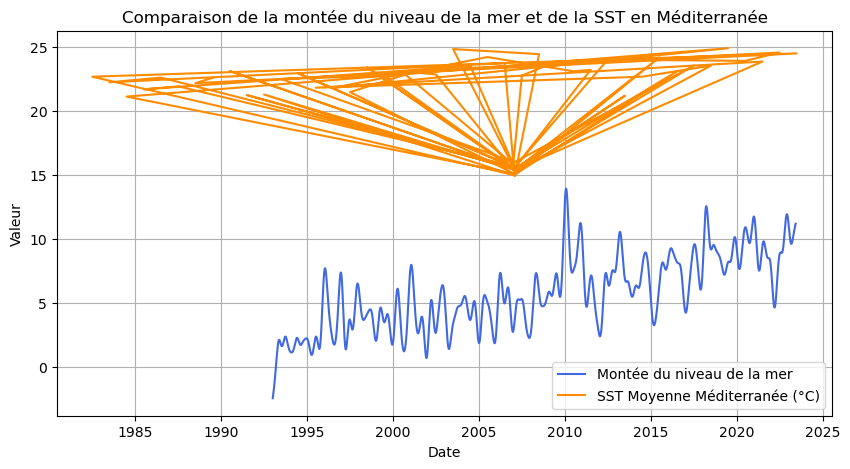

In [21]:
import xarray as xr
import matplotlib.pyplot as plt
import os

# --------------------- Partie 1 : Charger et traiter les données de montée du niveau de la mer ---------------------

# Charger le fichier de montée du niveau de la mer (remplacer par le chemin réel du fichier)
file_path_msl = 'my_data_folder/sea_level_folder/omi_climate_sl_medsea_area_averaged_anomalies_19930101_P20240228.nc'  # Remplacer par le chemin réel du fichier
ds_msl = xr.open_dataset(file_path_msl)

# Vérifier le nom de la variable temporelle dans le fichier de montée du niveau de la mer
time_variable_msl = 'time'  # Remplacer par le nom réel de la variable temporelle si nécessaire
time_values_msl = ds_msl[time_variable_msl].values  # Extraire les valeurs temporelles

# Sélectionner la première variable de montée du niveau de la mer
variable_msl = list(ds_msl.data_vars.keys())[0]

# Extraire les données de la variable de montée du niveau de la mer
msl_data = ds_msl[variable_msl]

# --------------------- Partie 2 : Charger et traiter les fichiers SST ---------------------

# Liste des fichiers SST (remplacez par votre chemin réel)
sst_folder_path = 'my_data_folder/eursst_folder'  # Remplacez par le chemin réel du dossier contenant vos fichiers SST
sst_files = [f for f in os.listdir(sst_folder_path) if f.endswith('.nc')]

# Créer une liste pour charger les datasets SST
sst_datasets = []

# Charger chaque fichier SST et extraire les données
for file_name in sst_files:
    file_path = os.path.join(sst_folder_path, file_name)
    print(f"Chargement du fichier SST : {file_path}")
    
    # Charger le fichier NetCDF
    ds_sst = xr.open_dataset(file_path)

    # Extraire les données SST dans la zone méditerranéenne
    lat_min = 30   # Latitude minimale (30°N)
    lat_max = 45   # Latitude maximale (45°N)
    lon_min = -5   # Longitude minimale (5°W)
    lon_max = 37   # Longitude maximale (37°E)

    sst_mediterranean = ds_sst['analysed_sst'].sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))

    # Ajouter le dataset à la liste
    sst_datasets.append(sst_mediterranean)

    # Fermer le dataset après l'avoir chargé
    ds_sst.close()

# Concaténer tous les fichiers SST dans un seul dataset
sst_combined = xr.concat(sst_datasets, dim='time')

# Calculer la moyenne de la SST sur la zone méditerranéenne (moyenne spatiale)
sst_mean_mediterranean = sst_combined.mean(dim=["lat", "lon"])

# --------------------- Partie 3 : Visualisation des données ---------------------

# Créer le graphique pour comparer les deux séries temporelles

plt.figure(figsize=(10, 5))

# Tracer la montée du niveau de la mer
plt.plot(time_values_msl, msl_data, label="Montée du niveau de la mer", color="royalblue")

# Tracer la SST moyenne en Méditerranée en Celsius
plt.plot(sst_mean_mediterranean.time, sst_mean_mediterranean - 273.15, label="SST Moyenne Méditerranée (°C)", color="darkorange")

# Ajouter des labels et un titre
plt.xlabel("Date")
plt.ylabel("Valeur")
plt.title("Comparaison de la montée du niveau de la mer et de la SST en Méditerranée")
plt.legend()
plt.grid()

# Afficher le graphique
plt.show()

# Fermer les datasets
ds_msl.close()


Chargement du fichier SST : my_data_folder/eursst_folder/19890701000000-IFR-L4_GHRSST-SSTfnd-ODYSSEA-ATL_MY_005_adjusted-v03.0-f01.0.nc
Chargement du fichier SST : my_data_folder/eursst_folder/19880701000000-IFR-L4_GHRSST-SSTfnd-ODYSSEA-ATL_MY_005_adjusted-v03.0-f01.0.nc
Chargement du fichier SST : my_data_folder/eursst_folder/20230701000000-IFR-L4_GHRSST-SSTfnd-ODYSSEA-ATL_MY_005_adjusted-v03.0-f01.0.nc
Chargement du fichier SST : my_data_folder/eursst_folder/19820701000000-IFR-L4_GHRSST-SSTfnd-ODYSSEA-ATL_MY_005_adjusted-v03.0-f01.0.nc
Chargement du fichier SST : my_data_folder/eursst_folder/20070128000000-IFR-L4_GHRSST-SSTfnd-ODYSSEA-ATL_MY_005_adjusted-v03.0-f01.0.nc
Chargement du fichier SST : my_data_folder/eursst_folder/20150701000000-IFR-L4_GHRSST-SSTfnd-ODYSSEA-ATL_MY_005_adjusted-v03.0-f01.0.nc
Chargement du fichier SST : my_data_folder/eursst_folder/20070122000000-IFR-L4_GHRSST-SSTfnd-ODYSSEA-ATL_MY_005_adjusted-v03.0-f01.0.nc
Chargement du fichier SST : my_data_folder/eurss

Chargement du fichier SST : my_data_folder/eursst_folder/20060701000000-IFR-L4_GHRSST-SSTfnd-ODYSSEA-ATL_MY_005_adjusted-v03.0-f01.0.nc
Chargement du fichier SST : my_data_folder/eursst_folder/19830701000000-IFR-L4_GHRSST-SSTfnd-ODYSSEA-ATL_MY_005_adjusted-v03.0-f01.0.nc
Chargement du fichier SST : my_data_folder/eursst_folder/19860701000000-IFR-L4_GHRSST-SSTfnd-ODYSSEA-ATL_MY_005_adjusted-v03.0-f01.0.nc
Chargement du fichier SST : my_data_folder/eursst_folder/20070108000000-IFR-L4_GHRSST-SSTfnd-ODYSSEA-ATL_MY_005_adjusted-v03.0-f01.0.nc
Chargement du fichier SST : my_data_folder/eursst_folder/20070131000000-IFR-L4_GHRSST-SSTfnd-ODYSSEA-ATL_MY_005_adjusted-v03.0-f01.0.nc
Chargement du fichier SST : my_data_folder/eursst_folder/20070110000000-IFR-L4_GHRSST-SSTfnd-ODYSSEA-ATL_MY_005_adjusted-v03.0-f01.0.nc
Chargement du fichier SST : my_data_folder/eursst_folder/20070112000000-IFR-L4_GHRSST-SSTfnd-ODYSSEA-ATL_MY_005_adjusted-v03.0-f01.0.nc
Chargement du fichier SST : my_data_folder/eurss

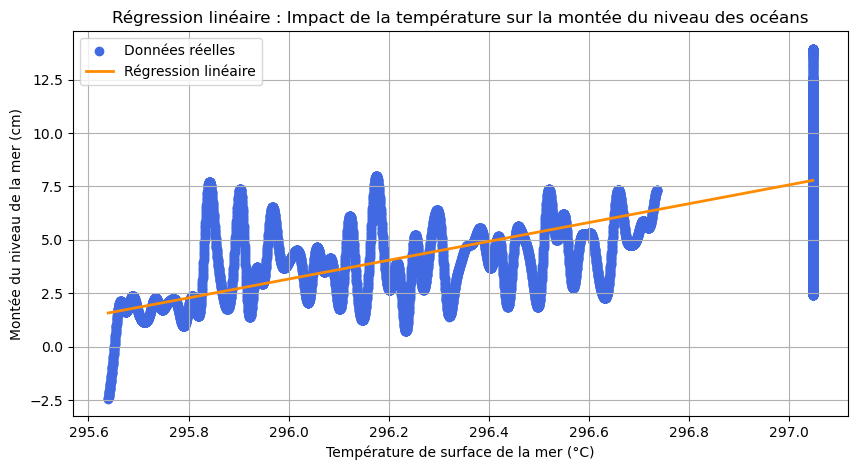

Coefficient de régression (pente) : 4.41 cm/°C
Ordonnée à l'origine (intercept) : -1302.53 cm


In [24]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import os

# --------------------- Partie 1 : Charger et traiter les données de montée du niveau de la mer ---------------------

# Charger le fichier de montée du niveau de la mer (remplacer par le chemin réel du fichier)
file_path_msl = 'my_data_folder/sea_level_folder/omi_climate_sl_medsea_area_averaged_anomalies_19930101_P20240228.nc'  # Remplacer par le chemin réel du fichier
ds_msl = xr.open_dataset(file_path_msl)

# Vérifier le nom de la variable temporelle dans le fichier de montée du niveau de la mer
time_variable_msl = 'time'  # Remplacer par le nom réel de la variable temporelle si nécessaire
time_values_msl = ds_msl[time_variable_msl].values  # Extraire les valeurs temporelles

# Convertir les temps en valeurs numériques (en jours depuis une date de référence)
time_msl_numeric = np.array([np.datetime64(t).astype(np.float64) for t in time_values_msl])

# Sélectionner la première variable de montée du niveau de la mer
variable_msl = list(ds_msl.data_vars.keys())[0]

# Extraire les données de la variable de montée du niveau de la mer
msl_data = ds_msl[variable_msl].values  # Données de MSL en cm

# --------------------- Partie 2 : Charger et traiter les fichiers SST ---------------------

# Liste des fichiers SST (remplacez par votre chemin réel)
sst_folder_path = 'my_data_folder/eursst_folder'  # Remplacez par le chemin réel du dossier contenant vos fichiers SST
sst_files = [f for f in os.listdir(sst_folder_path) if f.endswith('.nc')]

# Créer une liste pour charger les datasets SST
sst_datasets = []

# Charger chaque fichier SST et extraire les données
for file_name in sst_files:
    file_path = os.path.join(sst_folder_path, file_name)
    print(f"Chargement du fichier SST : {file_path}")
    
    # Charger le fichier NetCDF
    ds_sst = xr.open_dataset(file_path)

    # Extraire les données SST dans la zone méditerranéenne
    lat_min = 30   # Latitude minimale (30°N)
    lat_max = 45   # Latitude maximale (45°N)
    lon_min = -5   # Longitude minimale (5°W)
    lon_max = 37   # Longitude maximale (37°E)

    sst_mediterranean = ds_sst['analysed_sst'].sel(lat=slice(lat_min, lat_max), lon=slice(lon_min, lon_max))

    # Ajouter le dataset à la liste
    sst_datasets.append(sst_mediterranean)

    # Fermer le dataset après l'avoir chargé
    ds_sst.close()

# Concaténer tous les fichiers SST dans un seul dataset
sst_combined = xr.concat(sst_datasets, dim='time')

# Calculer la moyenne de la SST sur la zone méditerranéenne (moyenne spatiale)
sst_mean_mediterranean = sst_combined.mean(dim=["lat", "lon"]).values  # Convertir en numpy array

# --------------------- Partie 3 : Aligner les séries temporelles ---------------------

# Convertir les temps SST en valeurs numériques (en jours depuis une date de référence)
time_sst = sst_combined['time'].values
time_sst_numeric = np.array([np.datetime64(t).astype(np.float64) for t in time_sst])

# --------------------- Partie 4 : Interpolation de SST sur les dates de MSL ---------------------

# Interpoler la série SST sur les dates de MSL (temps MSL en jours et SST en années)
sst_interpolated = np.interp(time_msl_numeric, time_sst_numeric, sst_mean_mediterranean)

# --------------------- Partie 5 : Régression linéaire ---------------------

# Reshape les données pour la régression linéaire
X = sst_interpolated.reshape(-1, 1)  # Température de surface de la mer (en °C)
y = msl_data  # Montée du niveau de la mer (en cm)

# Créer le modèle de régression linéaire
model = LinearRegression()

# Ajuster le modèle aux données
model.fit(X, y)

# Coefficient de la régression et l'ordonnée à l'origine
slope = model.coef_[0]
intercept = model.intercept_

# Prédictions de la régression
y_pred = model.predict(X)

# --------------------- Partie 6 : Visualisation de la régression ---------------------

# Tracer les données réelles et la régression linéaire
plt.figure(figsize=(10, 5))
plt.scatter(X, y, color='royalblue', label='Données réelles')  # Points réels
plt.plot(X, y_pred, color='darkorange', label='Régression linéaire', linewidth=2)  # Ligne de régression
plt.xlabel("Température de surface de la mer (°K)")
plt.ylabel("Montée du niveau de la mer (cm)")
plt.title("Régression linéaire : Impact de la température sur la montée du niveau des océans")
plt.legend()
plt.grid()

# Affichage des résultats de la régression
plt.show()

# Afficher les résultats de la régression
print(f"Coefficient de régression (pente) : {slope:.2f} cm/°K")
print(f"Ordonnée à l'origine (intercept) : {intercept:.2f} cm")



Coefficient de régression (pente) : 4.41 cm/°C
Ordonnée à l'origine (intercept) : -1302.53 cm
R² (Coefficient de détermination) : 0.5646
RMSE (Erreur quadratique moyenne) : 1.8880 cm
MAE (Erreur absolue moyenne) : 1.4308 cm


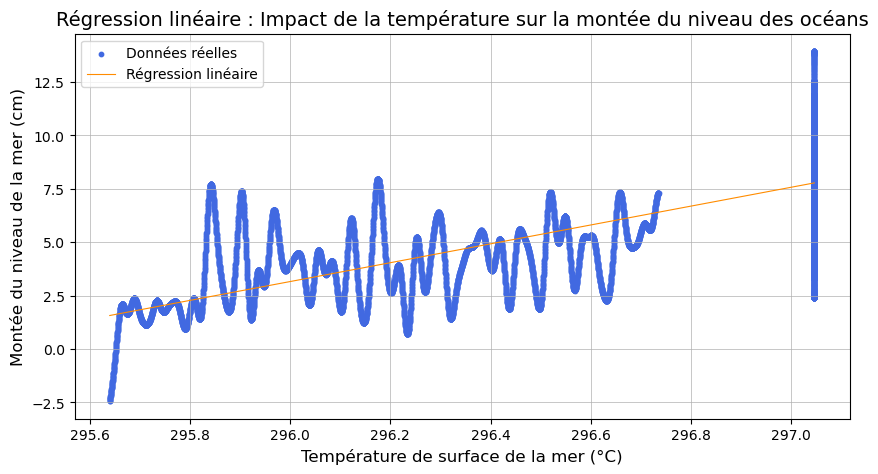

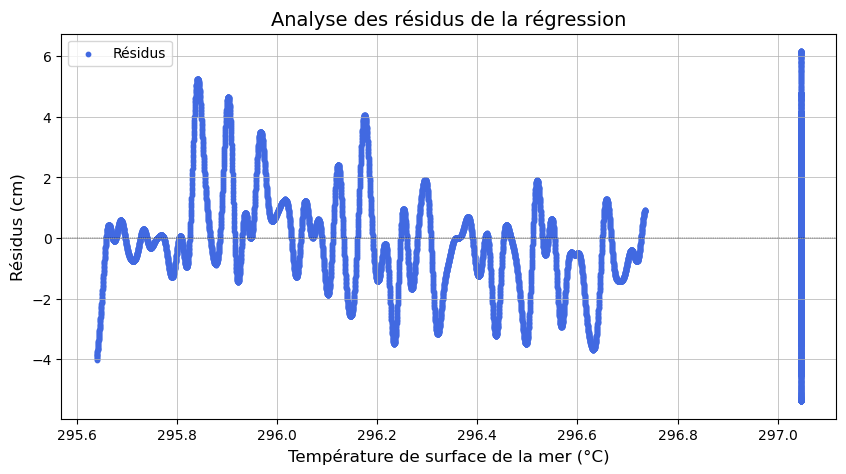

In [29]:
# --------------------- Partie 6 : Analyse des performances ---------------------
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# Calculer les métriques de performance
r2 = r2_score(y, y_pred)  # Coefficient de détermination
rmse = np.sqrt(mean_squared_error(y, y_pred))  # Erreur quadratique moyenne (RMSE)
mae = mean_absolute_error(y, y_pred)  # Erreur absolue moyenne (MAE)

# Affichage des résultats de la régression et des performances
print(f"Coefficient de régression (pente) : {slope:.2f} cm/°K")
print(f"Ordonnée à l'origine (intercept) : {intercept:.2f} cm")
print(f"R² (Coefficient de détermination) : {r2:.4f}")
print(f"RMSE (Erreur quadratique moyenne) : {rmse:.4f} cm")
print(f"MAE (Erreur absolue moyenne) : {mae:.4f} cm")

# --------------------- Partie 7 : Visualisation de la régression ---------------------

# Tracer les données réelles et la régression linéaire
plt.figure(figsize=(10, 5))
plt.scatter(X, y, color='royalblue', label='Données réelles', s=10)  # Ajustez la taille des points pour les rendre plus fins
plt.plot(X, y_pred, color='darkorange', label='Régression linéaire', linewidth=0.8)  # Ligne de régression avec un trait plus fin
plt.xlabel("Température de surface de la mer (°K)", fontsize=12)
plt.ylabel("Montée du niveau de la mer (cm)", fontsize=12)
plt.title("Régression linéaire : Impact de la température sur la montée du niveau des océans", fontsize=14)
plt.legend()
plt.grid(linewidth=0.5)  # Grille avec des lignes plus fines

# Affichage des résultats de la régression
plt.show()

# --------------------- Partie 8 : Visualisation des résidus ---------------------

# Résidus : Différence entre les valeurs réelles et prédites
residuals = y - y_pred

# Tracer les résidus
plt.figure(figsize=(10, 5))
plt.scatter(X, residuals, color='royalblue', label='Résidus', s=10)  # Ajustez la taille des points si nécessaire
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.3)  # Ligne horizontale à zéro avec un trait plus fin
plt.xlabel("Température de surface de la mer (°C)", fontsize=12)
plt.ylabel("Résidus (cm)", fontsize=12)
plt.title("Analyse des résidus de la régression", fontsize=14)
plt.legend()
plt.grid(linewidth=0.5)  # Grille avec des lignes plus fines


plt.show()


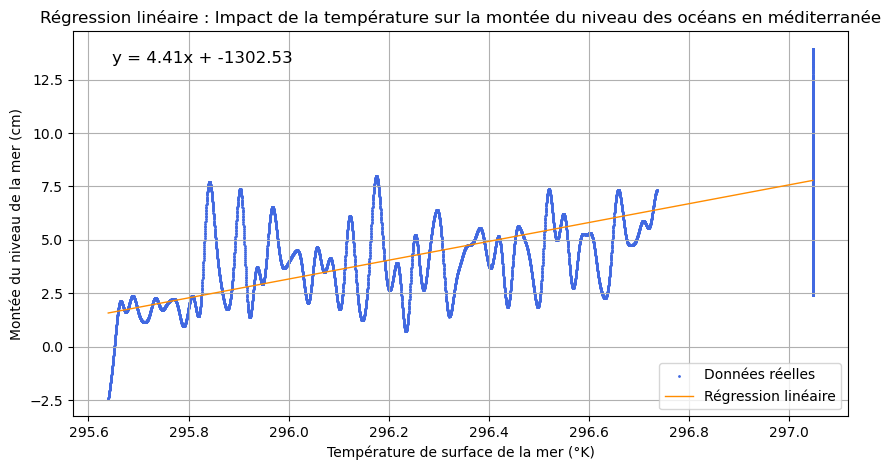

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Effectuer la régression linéaire
slope, intercept, r_value, p_value, std_err = stats.linregress(X.flatten(), y)

# Afficher la formule sur le graphique
plt.figure(figsize=(10, 5))
plt.scatter(X, y, color='royalblue', label='Données réelles', s=1)  # Points réels
plt.plot(X, y_pred, color='darkorange', label='Régression linéaire', linewidth=1)  # Ligne de régression

# Formule de la régression
equation = f"y = {slope:.2f}x + {intercept:.2f}"

# Afficher la formule sur le graphique
plt.text(0.05, 0.95, equation, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# Titre et légendes
plt.xlabel("Température de surface de la mer (°K)")
plt.ylabel("Montée du niveau de la mer (cm)")
plt.title("Régression linéaire : Impact de la température sur la montée du niveau des océans en méditerranée")
plt.legend()
plt.grid()
plt.show()


In [33]:
import scipy.stats as stats

# Effectuer la régression linéaire
slope, intercept, r_value, p_value, std_err = stats.linregress(X.flatten(), y)

# Afficher la p-value
print(f"p-value : {p_value}")a

p-value : 0.0


Ouverture du fichier : my_data_folder/sst_folder/sst_medsea_omi_tempsal_sst_area_averaged_monthly_anomalies_19820101-20231231_R19912020_P202405061.nc


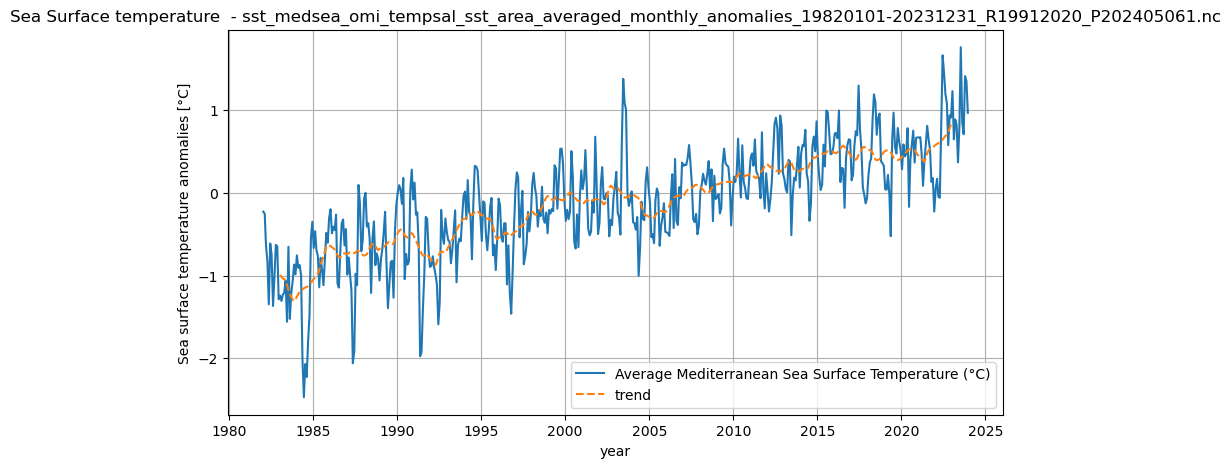

In [3]:
import xarray as xr
import matplotlib.pyplot as plt
import os

# Dossier contenant les fichiers NetCDF
folder_path = 'my_data_folder/sst_folder'

# Obtenez la liste des fichiers NetCDF dans le dossier
files = [f for f in os.listdir(folder_path) if f.endswith('.nc')]

# Visualiser les données
for file_name in files:
    file_path = os.path.join(folder_path, file_name)  # Créer le chemin complet du fichier
    print(f"Ouverture du fichier : {file_path}")
    
    # Charger le fichier NetCDF
    ds = xr.open_dataset(file_path)

    # Définir la liste des variables à tracer (assumer que tu veux toutes les variables du dataset)
    variables = list(ds.data_vars)  # Cela prend toutes les variables dans le dataset

    # Créer un graphique
    plt.figure(figsize=(10, 5))
    
    # Tracer toutes les variables sur le même graphe
    for i, variable_name in enumerate(variables):
        # Tracer la première variable avec une ligne continue
        if i == 0:
            ds[variable_name].plot(label="Average Mediterranean Sea Surface Temperature (°C)")
        # Tracer la deuxième variable avec une ligne pointillée
        elif i == 1:
            ds[variable_name].plot(label="trend", linestyle='--')
        else:
            ds[variable_name].plot(label=variable_name)
    
    # Ajouter un titre et des labels
    plt.title(f"Sea Surface temperature  - {file_name}")
    plt.xlabel("year")
    plt.ylabel("Sea surface temperature anomalies [°C]")
    plt.legend()
    plt.grid()
    plt.show()

    # Fermer le dataset
    ds.close()

    


In [9]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import os

# Dossier contenant les fichiers NetCDF pour les anomalies SST
sst_folder_path = 'my_data_folder/sst_folder'
# Dossier contenant les fichiers NetCDF pour les niveaux de la mer
sea_level_folder_path = 'my_data_folder/sea_level_folder'

# Obtenez la liste des fichiers NetCDF pour SST
sst_files = [f for f in os.listdir(sst_folder_path) if f.endswith('.nc')]

# Obtenez la liste des fichiers NetCDF pour Sea Level
sea_level_files = [f for f in os.listdir(sea_level_folder_path) if f.endswith('.nc')]

# Charger les données SST
sst_data = None
for file_name in sst_files:
    sst_file_path = os.path.join(sst_folder_path, file_name)
    print(f"Ouverture du fichier SST : {sst_file_path}")
    sst_ds = xr.open_dataset(sst_file_path)
    
    # Supposons que la variable d'anomalie SST s'appelle 'sst_anomaly'
    if sst_data is None:
        sst_data = sst_ds['sst_anomaly']
    else:
        sst_data = sst_data.combine_first(sst_ds['sst_anomaly'])
    sst_ds.close()

# Inspecter les variables dans les fichiers Sea Level
for file_name in sea_level_files:
    sea_level_file_path = os.path.join(sea_level_folder_path, file_name)
    print(f"Ouverture du fichier Sea Level : {sea_level_file_path}")
    sea_level_ds = xr.open_dataset(sea_level_file_path)
    
    # Afficher les variables disponibles
    print(f"Variables disponibles dans le fichier {file_name}: {list(sea_level_ds.variables)}")
    
    sea_level_ds.close()

# Maintenant que vous connaissez le bon nom de la variable, vous pouvez utiliser celui-ci
# Pour cet exemple, nous utilisons 'MSL_filtered_GIA_TPA_corrected_adjusted' comme nom de la variable
sea_level_data = None
for file_name in sea_level_files:
    sea_level_file_path = os.path.join(sea_level_folder_path, file_name)
    print(f"Ouverture du fichier Sea Level : {sea_level_file_path}")
    sea_level_ds = xr.open_dataset(sea_level_file_path)
    
    # Utiliser la variable correcte
    if sea_level_data is None:
        sea_level_data = sea_level_ds['MSL_filtered_GIA_TPA_corrected_adjusted']
    else:
        sea_level_data = sea_level_data.combine_first(sea_level_ds['MSL_filtered_GIA_TPA_corrected_adjusted'])
    sea_level_ds.close()

# Assurez-vous que les données sont alignées sur le temps
# Nous utilisons ici l'index temporel pour aligner les données
common_time = sst_data.time.values  # supposons que la dimension de temps est la même

# Extraire les valeurs de SST et de niveau de la mer pour la régression
sst_values = sst_data.values
sea_level_values = sea_level_data.sel(time=common_time).values

# Supprimer les valeurs manquantes
mask = ~np.isnan(sst_values) & ~np.isnan(sea_level_values)
sst_values = sst_values[mask]
sea_level_values = sea_level_values[mask]

# Régression linéaire
slope, intercept, r_value, p_value, std_err = linregress(sst_values, sea_level_values)

# Créer un graphique
plt.figure(figsize=(10, 5))
plt.scatter(sst_values, sea_level_values, label='Data', color='blue', alpha=0.5)
plt.plot(sst_values, slope * sst_values + intercept, label=f'Fit: y = {slope:.4f}x + {intercept:.4f}', color='red')

# Ajouter un titre et des labels
plt.title("Régression linéaire: Anomalies SST vs Niveau de la mer")
plt.xlabel("Anomalies de SST (°C)")
plt.ylabel("Niveau de la mer (cm)")
plt.legend()
plt.grid()
plt.show()

# Afficher les résultats de la régression
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")



Ouverture du fichier SST : my_data_folder/sst_folder/sst_medsea_omi_tempsal_sst_area_averaged_monthly_anomalies_19820101-20231231_R19912020_P202405061.nc
Ouverture du fichier Sea Level : my_data_folder/sea_level_folder/omi_climate_sl_medsea_area_averaged_anomalies_19930101_P20240228.nc
Variables disponibles dans le fichier omi_climate_sl_medsea_area_averaged_anomalies_19930101_P20240228.nc: ['MSL_filtered_GIA_TPA_corrected_adjusted', 'trend_MSL_filtered_GIA_TPA_corrected_adjusted', 'time']
Ouverture du fichier Sea Level : my_data_folder/sea_level_folder/omi_climate_sl_medsea_area_averaged_anomalies_19930101_P20240228.nc


KeyError: "not all values found in index 'time'"

Ouverture du fichier SST : my_data_folder/sst_folder/sst_medsea_omi_tempsal_sst_area_averaged_monthly_anomalies_19820101-20231231_R19912020_P202405061.nc
Ouverture du fichier Sea Level : my_data_folder/sea_level_folder/omi_climate_sl_medsea_area_averaged_anomalies_19930101_P20240228.nc
Variables disponibles dans le fichier omi_climate_sl_medsea_area_averaged_anomalies_19930101_P20240228.nc: ['MSL_filtered_GIA_TPA_corrected_adjusted', 'trend_MSL_filtered_GIA_TPA_corrected_adjusted', 'time']
Ouverture du fichier Sea Level : my_data_folder/sea_level_folder/omi_climate_sl_medsea_area_averaged_anomalies_19930101_P20240228.nc
Temps pour SST: ['1982-01-15T00:00:00.000000000' '1982-02-15T00:00:00.000000000'
 '1982-03-15T00:00:00.000000000' '1982-04-15T00:00:00.000000000'
 '1982-05-15T00:00:00.000000000' '1982-06-15T00:00:00.000000000'
 '1982-07-15T00:00:00.000000000' '1982-08-15T00:00:00.000000000'
 '1982-09-15T00:00:00.000000000' '1982-10-15T00:00:00.000000000']
Temps pour Sea Level: ['1993-0

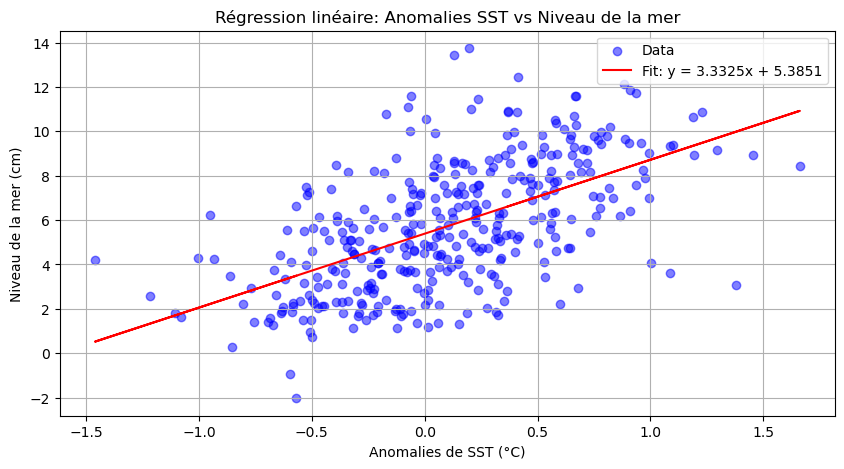

Slope: 3.3324765797712876
Intercept: 5.385100411697168
R-squared: 0.3311654110824683


In [16]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import os

# Dossier contenant les fichiers NetCDF pour SST
sst_folder_path = 'my_data_folder/sst_folder'
# Dossier contenant les fichiers NetCDF pour les niveaux de la mer
sea_level_folder_path = 'my_data_folder/sea_level_folder'

# Obtenez la liste des fichiers NetCDF pour SST
sst_files = [f for f in os.listdir(sst_folder_path) if f.endswith('.nc')]

# Obtenez la liste des fichiers NetCDF pour Sea Level
sea_level_files = [f for f in os.listdir(sea_level_folder_path) if f.endswith('.nc')]

# Charger les données SST
sst_data = None
for file_name in sst_files:
    sst_file_path = os.path.join(sst_folder_path, file_name)
    print(f"Ouverture du fichier SST : {sst_file_path}")
    sst_ds = xr.open_dataset(sst_file_path)
    
    # Supposons que la variable d'anomalie SST s'appelle 'sst_anomaly'
    if sst_data is None:
        sst_data = sst_ds['sst_anomaly']
    else:
        sst_data = sst_data.combine_first(sst_ds['sst_anomaly'])
    sst_ds.close()

# Inspecter les variables dans les fichiers Sea Level
for file_name in sea_level_files:
    sea_level_file_path = os.path.join(sea_level_folder_path, file_name)
    print(f"Ouverture du fichier Sea Level : {sea_level_file_path}")
    sea_level_ds = xr.open_dataset(sea_level_file_path)
    
    # Afficher les variables disponibles
    print(f"Variables disponibles dans le fichier {file_name}: {list(sea_level_ds.variables)}")
    
    sea_level_ds.close()

# Maintenant que vous connaissez le bon nom de la variable, vous pouvez utiliser celui-ci
# Pour cet exemple, nous utilisons 'MSL_filtered_GIA_TPA_corrected_adjusted' comme nom de la variable
sea_level_data = None
for file_name in sea_level_files:
    sea_level_file_path = os.path.join(sea_level_folder_path, file_name)
    print(f"Ouverture du fichier Sea Level : {sea_level_file_path}")
    sea_level_ds = xr.open_dataset(sea_level_file_path)
    
    # Utiliser la variable correcte
    if sea_level_data is None:
        sea_level_data = sea_level_ds['MSL_filtered_GIA_TPA_corrected_adjusted']
    else:
        sea_level_data = sea_level_data.combine_first(sea_level_ds['MSL_filtered_GIA_TPA_corrected_adjusted'])
    sea_level_ds.close()

# Inspecter les coordonnées temporelles de chaque dataset
print(f"Temps pour SST: {sst_data.time.values[:10]}")  # Afficher les 10 premières valeurs
print(f"Temps pour Sea Level: {sea_level_data.time.values[:10]}") 

common_time_start = max(sst_data.time.min(), sea_level_data.time.min())  # 1993-01-01
common_time_end = min(sst_data.time.max(), sea_level_data.time.max())  # 2023-06-07

# Filtrer les données SST
sst_data_common = sst_data.sel(time=slice(common_time_start, common_time_end))

# Filtrer les données du niveau de la mer
sea_level_data_common = sea_level_data.sel(time=slice(common_time_start, common_time_end))


# Régression linéaire
slope, intercept, r_value, p_value, std_err = linregress(sst_values, sea_level_values)

# Créer un graphique
plt.figure(figsize=(10, 5))
plt.scatter(sst_values, sea_level_values, label='Data', color='blue', alpha=0.5)
plt.plot(sst_values, slope * sst_values + intercept, label=f'Fit: y = {slope:.4f}x + {intercept:.4f}', color='red')

# Ajouter un titre et des labels
plt.title("Régression linéaire: Anomalies SST vs Niveau de la mer")
plt.xlabel("Anomalies de SST (°C)")
plt.ylabel("Niveau de la mer (cm)")
plt.legend()
plt.grid()
plt.show()

# Afficher les résultats de la régression
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")


Ouverture du fichier SST : my_data_folder/sst_folder/sst_medsea_omi_tempsal_sst_area_averaged_monthly_anomalies_19820101-20231231_R19912020_P202405061.nc
Ouverture du fichier Sea Level : my_data_folder/sea_level_folder/omi_climate_sl_medsea_area_averaged_anomalies_19930101_P20240228.nc
Variables disponibles dans le fichier omi_climate_sl_medsea_area_averaged_anomalies_19930101_P20240228.nc: ['MSL_filtered_GIA_TPA_corrected_adjusted', 'trend_MSL_filtered_GIA_TPA_corrected_adjusted', 'time']
Ouverture du fichier Sea Level : my_data_folder/sea_level_folder/omi_climate_sl_medsea_area_averaged_anomalies_19930101_P20240228.nc
Temps pour SST: ['1982-01-15T00:00:00.000000000' '1982-02-15T00:00:00.000000000'
 '1982-03-15T00:00:00.000000000' '1982-04-15T00:00:00.000000000'
 '1982-05-15T00:00:00.000000000' '1982-06-15T00:00:00.000000000'
 '1982-07-15T00:00:00.000000000' '1982-08-15T00:00:00.000000000'
 '1982-09-15T00:00:00.000000000' '1982-10-15T00:00:00.000000000']
Temps pour Sea Level: ['1993-0

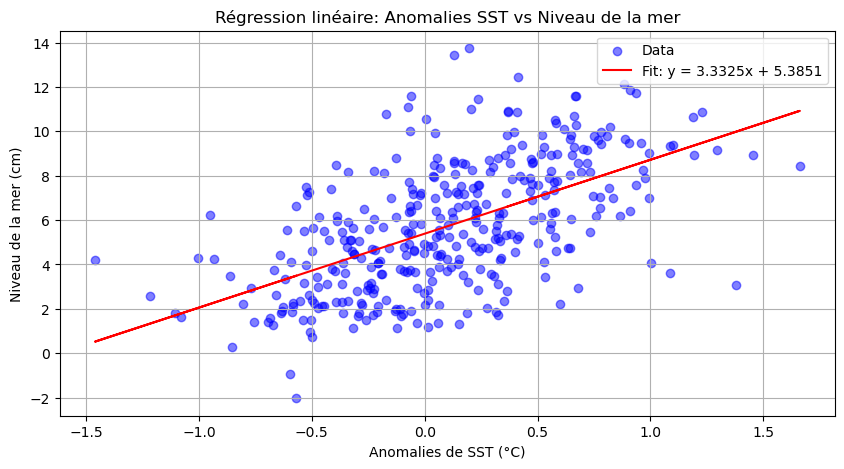

Slope: 3.3324765797712876
Intercept: 5.385100411697168
R-squared: 0.3311654110824683


In [18]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import os

# Dossier contenant les fichiers NetCDF pour SST
sst_folder_path = 'my_data_folder/sst_folder'
# Dossier contenant les fichiers NetCDF pour les niveaux de la mer
sea_level_folder_path = 'my_data_folder/sea_level_folder'

# Obtenez la liste des fichiers NetCDF pour SST
sst_files = [f for f in os.listdir(sst_folder_path) if f.endswith('.nc')]

# Obtenez la liste des fichiers NetCDF pour Sea Level
sea_level_files = [f for f in os.listdir(sea_level_folder_path) if f.endswith('.nc')]

# Charger les données SST
sst_data = None
for file_name in sst_files:
    sst_file_path = os.path.join(sst_folder_path, file_name)
    print(f"Ouverture du fichier SST : {sst_file_path}")
    sst_ds = xr.open_dataset(sst_file_path)
    
    # Supposons que la variable d'anomalie SST s'appelle 'sst_anomaly'
    if sst_data is None:
        sst_data = sst_ds['sst_anomaly']
    else:
        sst_data = sst_data.combine_first(sst_ds['sst_anomaly'])
    sst_ds.close()

# Inspecter les variables dans les fichiers Sea Level
for file_name in sea_level_files:
    sea_level_file_path = os.path.join(sea_level_folder_path, file_name)
    print(f"Ouverture du fichier Sea Level : {sea_level_file_path}")
    sea_level_ds = xr.open_dataset(sea_level_file_path)
    
    # Afficher les variables disponibles
    print(f"Variables disponibles dans le fichier {file_name}: {list(sea_level_ds.variables)}")
    
    sea_level_ds.close()

# Maintenant que vous connaissez le bon nom de la variable, vous pouvez utiliser celui-ci
# Pour cet exemple, nous utilisons 'MSL_filtered_GIA_TPA_corrected_adjusted' comme nom de la variable
sea_level_data = None
for file_name in sea_level_files:
    sea_level_file_path = os.path.join(sea_level_folder_path, file_name)
    print(f"Ouverture du fichier Sea Level : {sea_level_file_path}")
    sea_level_ds = xr.open_dataset(sea_level_file_path)
    
    # Utiliser la variable correcte
    if sea_level_data is None:
        sea_level_data = sea_level_ds['MSL_filtered_GIA_TPA_corrected_adjusted']
    else:
        sea_level_data = sea_level_data.combine_first(sea_level_ds['MSL_filtered_GIA_TPA_corrected_adjusted'])
    sea_level_ds.close()

# Inspecter les coordonnées temporelles de chaque dataset
print(f"Temps pour SST: {sst_data.time.values[:10]}")  # Afficher les 10 premières valeurs
print(f"Temps pour Sea Level: {sea_level_data.time.values[:10]}") 

# Trouver l'intervalle de temps commun
common_time_start = max(sst_data.time.min(), sea_level_data.time.min())  # 1993-01-01
common_time_end = min(sst_data.time.max(), sea_level_data.time.max())  # 2023-06-07

# Filtrer les données SST et Sea Level pour l'intervalle de temps commun
sst_data_common = sst_data.sel(time=slice(common_time_start, common_time_end))
sea_level_data_common = sea_level_data.sel(time=slice(common_time_start, common_time_end))

# Aligner les données sur le temps (s'assurer que les deux séries ont la même taille et les mêmes dates)
sst_data_common, sea_level_data_common = xr.align(sst_data_common, sea_level_data_common, join='inner')

# Convertir les données de SST et Sea Level en tableaux pour la régression
sst_values = sst_data_common.values
sea_level_values = sea_level_data_common.values

# Supprimer les valeurs manquantes
mask = ~np.isnan(sst_values) & ~np.isnan(sea_level_values)
sst_values = sst_values[mask]
sea_level_values = sea_level_values[mask]

# Régression linéaire
slope, intercept, r_value, p_value, std_err = linregress(sst_values, sea_level_values)

# Créer un graphique
plt.figure(figsize=(10, 5))
plt.scatter(sst_values, sea_level_values, label='Data', color='blue', alpha=0.5)
plt.plot(sst_values, slope * sst_values + intercept, label=f'Fit: y = {slope:.4f}x + {intercept:.4f}', color='red')

# Ajouter un titre et des labels
plt.title("Régression linéaire: Anomalies SST vs Niveau de la mer")
plt.xlabel("Anomalies de SST (°C)")
plt.ylabel("Niveau de la mer (cm)")
plt.legend()
plt.grid()
plt.show()

# Afficher les résultats de la régression
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")


Ouverture du fichier SST : my_data_folder/sst_folder/sst_medsea_omi_tempsal_sst_area_averaged_monthly_anomalies_19820101-20231231_R19912020_P202405061.nc
Ouverture du fichier Sea Level : my_data_folder/sea_level_folder/omi_climate_sl_medsea_area_averaged_anomalies_19930101_P20240228.nc
Variables disponibles dans le fichier omi_climate_sl_medsea_area_averaged_anomalies_19930101_P20240228.nc: ['MSL_filtered_GIA_TPA_corrected_adjusted', 'trend_MSL_filtered_GIA_TPA_corrected_adjusted', 'time']
Ouverture du fichier Sea Level : my_data_folder/sea_level_folder/omi_climate_sl_medsea_area_averaged_anomalies_19930101_P20240228.nc
Temps pour SST: ['1982-01-15T00:00:00.000000000' '1982-02-15T00:00:00.000000000'
 '1982-03-15T00:00:00.000000000' '1982-04-15T00:00:00.000000000'
 '1982-05-15T00:00:00.000000000' '1982-06-15T00:00:00.000000000'
 '1982-07-15T00:00:00.000000000' '1982-08-15T00:00:00.000000000'
 '1982-09-15T00:00:00.000000000' '1982-10-15T00:00:00.000000000']
Temps pour Sea Level: ['1993-0

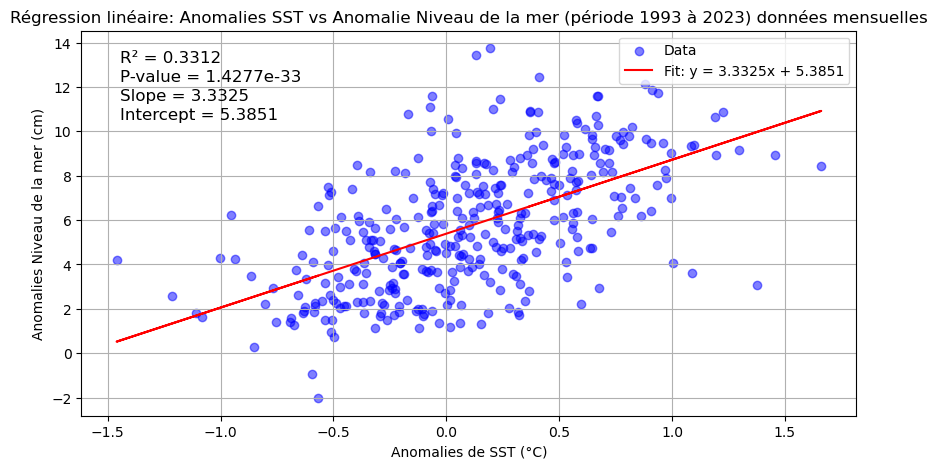

Slope: 3.3324765797712876
Intercept: 5.385100411697168
R-squared: 0.3311654110824683


In [22]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import os

# Dossier contenant les fichiers NetCDF pour SST
sst_folder_path = 'my_data_folder/sst_folder'
# Dossier contenant les fichiers NetCDF pour les niveaux de la mer
sea_level_folder_path = 'my_data_folder/sea_level_folder'

# Obtenez la liste des fichiers NetCDF pour SST
sst_files = [f for f in os.listdir(sst_folder_path) if f.endswith('.nc')]

# Obtenez la liste des fichiers NetCDF pour Sea Level
sea_level_files = [f for f in os.listdir(sea_level_folder_path) if f.endswith('.nc')]

# Charger les données SST
sst_data = None
for file_name in sst_files:
    sst_file_path = os.path.join(sst_folder_path, file_name)
    print(f"Ouverture du fichier SST : {sst_file_path}")
    sst_ds = xr.open_dataset(sst_file_path)
    
    # Supposons que la variable d'anomalie SST s'appelle 'sst_anomaly'
    if sst_data is None:
        sst_data = sst_ds['sst_anomaly']
    else:
        sst_data = sst_data.combine_first(sst_ds['sst_anomaly'])
    sst_ds.close()

# Inspecter les variables dans les fichiers Sea Level
for file_name in sea_level_files:
    sea_level_file_path = os.path.join(sea_level_folder_path, file_name)
    print(f"Ouverture du fichier Sea Level : {sea_level_file_path}")
    sea_level_ds = xr.open_dataset(sea_level_file_path)
    
    # Afficher les variables disponibles
    print(f"Variables disponibles dans le fichier {file_name}: {list(sea_level_ds.variables)}")
    
    sea_level_ds.close()

# Maintenant que vous connaissez le bon nom de la variable, vous pouvez utiliser celui-ci
# Pour cet exemple, nous utilisons 'MSL_filtered_GIA_TPA_corrected_adjusted' comme nom de la variable
sea_level_data = None
for file_name in sea_level_files:
    sea_level_file_path = os.path.join(sea_level_folder_path, file_name)
    print(f"Ouverture du fichier Sea Level : {sea_level_file_path}")
    sea_level_ds = xr.open_dataset(sea_level_file_path)
    
    # Utiliser la variable correcte
    if sea_level_data is None:
        sea_level_data = sea_level_ds['MSL_filtered_GIA_TPA_corrected_adjusted']
    else:
        sea_level_data = sea_level_data.combine_first(sea_level_ds['MSL_filtered_GIA_TPA_corrected_adjusted'])
    sea_level_ds.close()

# Inspecter les coordonnées temporelles de chaque dataset
print(f"Temps pour SST: {sst_data.time.values[:10]}")  # Afficher les 10 premières valeurs
print(f"Temps pour Sea Level: {sea_level_data.time.values[:10]}") 

# Trouver l'intervalle de temps commun
common_time_start = max(sst_data.time.min(), sea_level_data.time.min())  # 1993-01-01
common_time_end = min(sst_data.time.max(), sea_level_data.time.max())  # 2023-06-07

# Filtrer les données SST et Sea Level pour l'intervalle de temps commun
sst_data_common = sst_data.sel(time=slice(common_time_start, common_time_end))
sea_level_data_common = sea_level_data.sel(time=slice(common_time_start, common_time_end))

# Aligner les données sur le temps (s'assurer que les deux séries ont la même taille et les mêmes dates)
sst_data_common, sea_level_data_common = xr.align(sst_data_common, sea_level_data_common, join='inner')

# Convertir les données de SST et Sea Level en tableaux pour la régression
sst_values = sst_data_common.values
sea_level_values = sea_level_data_common.values

# Supprimer les valeurs manquantes
mask = ~np.isnan(sst_values) & ~np.isnan(sea_level_values)
sst_values = sst_values[mask]
sea_level_values = sea_level_values[mask]

print(f"Temps pour SST : {sst_data.time.min().values} à {sst_data.time.max().values}")
print(f"Temps pour Sea Level : {sea_level_data.time.min().values} à {sea_level_data.time.max().values}")
print(f"Temps commun après filtrage: {sst_data_common.time.values[:10]} à {sst_data_common.time.values[-10:]}")


# Compter le nombre de points valides dans les deux séries (SST et niveau de la mer)
n_points = len(sst_values)
print(f"Nombre de points utilisés dans la régression : {n_points}")

# Régression linéaire
slope, intercept, r_value, p_value, std_err = linregress(sst_values, sea_level_values)

# Créer un graphique
plt.figure(figsize=(10, 5))
plt.scatter(sst_values, sea_level_values, label='Data', color='blue', alpha=0.5)
plt.plot(sst_values, slope * sst_values + intercept, label=f'Fit: y = {slope:.4f}x + {intercept:.4f}', color='red')

# Ajouter des performances de régression sur le graphique
plt.text(0.05, 0.95, f'R² = {r_value**2:.4f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.text(0.05, 0.90, f'P-value = {p_value:.4e}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.text(0.05, 0.85, f'Slope = {slope:.4f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.text(0.05, 0.80, f'Intercept = {intercept:.4f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')


# Ajouter un titre et des labels
plt.title("Régression linéaire: Anomalies SST vs Anomalie Niveau de la mer (période 1993 à 2023) données mensuelles")
plt.xlabel("Anomalies de SST (°C)")
plt.ylabel("Anomalies Niveau de la mer (cm)")
plt.legend()
plt.grid()
plt.show()

# Afficher les résultats de la régression
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
